In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.neighbors import NearestNeighbors
import cv2
import statistics
import math

In [2]:
from keras.datasets import mnist

In [3]:
#Function to plot any number in the training data
def plotImg(index, images):
    
    fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(20,20))
    ax0=plt.subplot(2,2,1)
    ax1=plt.subplot(2,2,2)
    
    ax0.imshow(images[index])

    
    red = images[index][:,:,0]
    green = images[index][:,:,1]
    blue = images[index][:,:,2]
    print(red.shape)
    bins = np.linspace(0, 255, 100)

    n, bins, patches = plt.hist(red.flatten(), bins, color='red', alpha=0.5)
    n, bins, patches = plt.hist(green.flatten(), bins, color='green', alpha=0.5)
    n, bins, patches = plt.hist(blue.flatten(), bins, color='blue', alpha=0.5)

    plt.show()
    plt.close()
    
    #minimum
    r_minimum = min(red.flatten())
    g_minimum = min(green.flatten())
    b_minimum = min(blue.flatten())
    #maximum
    r_maximum = max(red.flatten())
    g_maximum = max(green.flatten())
    b_maximum = max(blue.flatten())
    #std deviation
    r_std = np.std(red.flatten())
    g_std = np.std(green.flatten())
    b_std = np.std(blue.flatten())
    #mean
    r_mean = statistics.mean(red.flatten())
    g_mean = statistics.mean(green.flatten())
    b_mean = statistics.mean(blue.flatten())
    
    
    print("Standard deviation is: \n RED: ", r_std, "\n GREEN: ", g_std, "\n BLUE: ", b_std)
    print("Minimum is: \n RED: ", r_minimum, "\n GREEN: ", g_minimum, "\n BLUE: ", b_minimum)
    print("Maximum is: \n RED: ", r_maximum, "\n GREEN: ", g_maximum, "\n BLUE: ", b_maximum)
    print("Mean is: \n RED: ", r_mean, "\n GREEN: ", g_mean, "\n BLUE: ", b_mean)






(960, 1920)


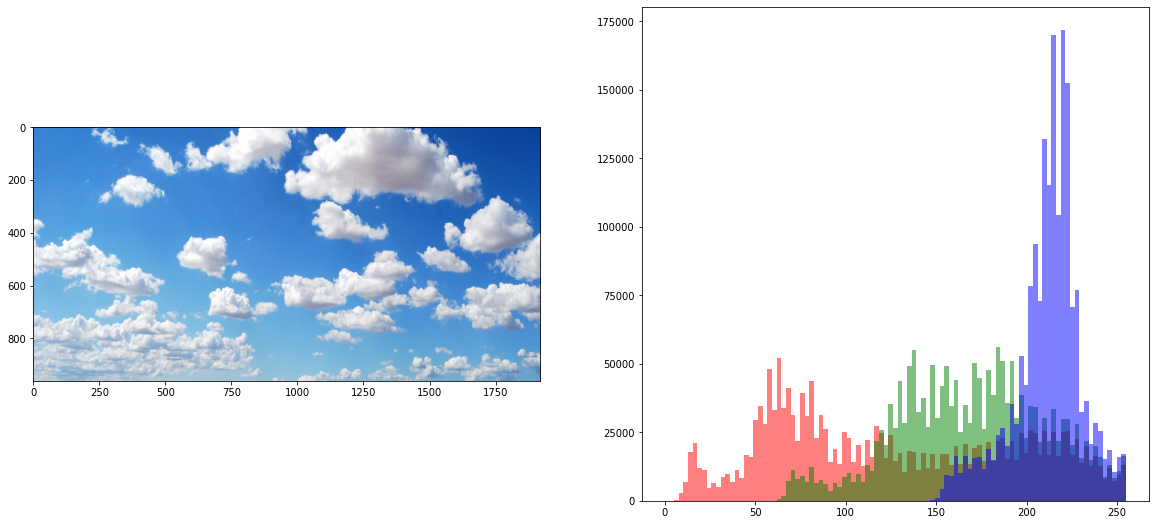

Standard deviation is: 
 RED:  66.38598724997908 
 GREEN:  41.52761200188264 
 BLUE:  18.75888292273975
Minimum is: 
 RED:  0 
 GREEN:  50 
 BLUE:  126
Maximum is: 
 RED:  255 
 GREEN:  255 
 BLUE:  255
Mean is: 
 RED:  127 
 GREEN:  169 
 BLUE:  211


In [4]:
images = []
images.append(cv2.imread('./woods.jpg'))
images.append(cv2.imread('./city.jpeg'))
images.append(cv2.imread('./house.jpg'))    
images.append(cv2.imread('./bike.jpeg'))
images.append(cv2.imread('./sky.jpg'))

for i in range(0,len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    

plotImg(4,images)


In [5]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [6]:

Xtr.shape


(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

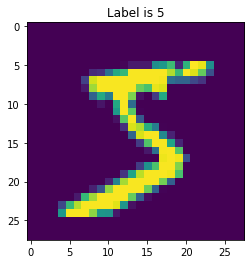

In [8]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


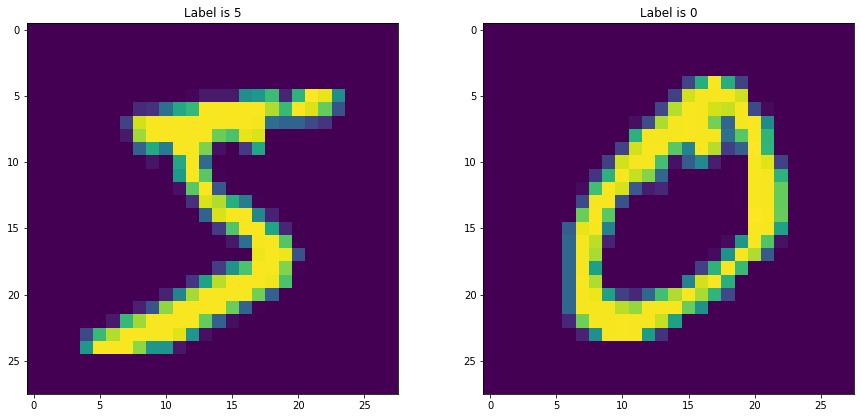

In [9]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [10]:
28*28

784

In [11]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int)
Tr_set.shape

(500, 784)

Good link: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
Difference: astype(int)

In [12]:
#L1 Norm accuracy is: 0.811
def predictL1(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [13]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
#print(Test_images[0,:])
Labels_predicted=predictL1(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



Accuracy: 0.811


In [14]:
#L2 Norm accuracy 0.8294

def predictL2(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.square(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [15]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predictL2(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))




Accuracy: 0.8294


In [16]:
#link: https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 
  

In [17]:
#Closest k-neighbors 
def predictK(X,k):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(0,num_test):#for i in range(num_test):

        distances=np.sum(np.square(Tr_set-X[i,:]),axis=1)
        nbrs = []
        for j in range(k):
            min_index= np.argmin(distances)
            nbrs.append(Ltr_set[min_index])
            distances = np.delete(distances, min_index)
            #distances.delete(min_index)
        Lpred[i]=most_frequent(nbrs)
    return Lpred

In [18]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predictK(Test_images,1)

print("Accuracy:", np.mean(Labels_predicted==L_test))




Accuracy: 0.8294



Bug fix explanation: This is due to how numpy handles floats and ints. 

In [19]:
def L1Distance(X, Trainingset, i):
    return np.sum(np.abs(Trainingset-X[i,:]),axis=1)  

def L2Distance(X, Trainingset, i):
    return np.sum(np.square(Trainingset-X[i,:]),axis=1) 

def createBatches(Trainingset, folds):
    batches = []
    batchLength = math.ceil(Trainingset.shape[0]/folds)
    threshold = batchLength
    batch = []
    for i in range(Trainingset.shape[0]):# i 0=>499
        if (i >= threshold or i >= Trainingset.shape[0]-1): #i=166
            if(len(batch) == 0):
                print("BREAK")
                break
            batch.append(Trainingset[i,:])
            batches.append(np.asarray(batch))
            #print("batch",len(batch))
            batch = []
            threshold += batchLength
            
        else:
            #print("Thresh:",threshold,"TRAINING SHAPE:",Trainingset.shape[0],"i:",i)
            batch.append(Trainingset[i,:])
    return np.asarray(batches)

def predictHyper(X, Trainingset, k, distFunc):
    num_test = X.shape[0]     
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    for i in range(0,num_test):  
        distances = distFunc(X,Trainingset, i)
        nbrs = []     
        for j in range(k):        
            min_index= np.argmin(distances)
            nbrs.append(Ltr_set[min_index])      
            distances = np.delete(distances, min_index)   
            #distances.delete(min_index)
        Lpred[i]=most_frequent(nbrs)
    return Lpred

def crossValidation(X, Trainingset, labelset, distFunc, folds):
    #Training batches
    batches = createBatches(Trainingset, folds)
    validation = batches[len(batches)-1]
    batches = np.delete(batches, len(batches)-1)
    
    validationLabels = labelset[len(labelset) - len(validation):]
    
    bestK = 1
    bestAccuracy = 0
    
    training = []
    for batch in batches:
        for i in range(len(batch)):
            training.append(batch[i])
    training = np.asarray(training)
    
    for k in range(1,10):
        Labels_predicted = predictHyper(validation, training, k, distFunc)
        accuracy = np.mean(validationLabels==Labels_predicted)
        print("Accuracy:",accuracy,"K", k)
        if(accuracy > bestAccuracy):
            bestAccuracy = accuracy
            bestK = k
    print("Best K was",bestK,"With an accuracy of",bestAccuracy)
    

In [20]:
#Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
#Labels_predicted=predictHyper(Test_images,1,L2Distan, 3)

#print("Accuracy:", np.mean(Labels_predicted==L_test))
crossValidation(Test_images, Tr_set, Ltr_set, L2Distance, 3)


c:\users\tompa\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Accuracy: 0.8363636363636363 K 1
Accuracy: 0.8363636363636363 K 2
Accuracy: 0.8181818181818182 K 3
Accuracy: 0.7636363636363637 K 4
Accuracy: 0.703030303030303 K 5
Accuracy: 0.696969696969697 K 6
Accuracy: 0.6909090909090909 K 7
Accuracy: 0.6787878787878788 K 8
Accuracy: 0.6848484848484848 K 9
Best K was 1 With an accuracy of 0.8363636363636363


Best accuracy was given by k=1 and had an accuracy of 83.6%

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, f1_score

In [22]:

iris = load_iris()



X = iris.data[:,:2] #First two features
y = iris.target
feature_names = iris.feature_names[:2]
print(iris.feature_names)
classes = iris.target_names

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, train_size=0.8)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [23]:
linearOVR = svm.SVC(kernel='linear', decision_function_shape='ovr').fit(X_train,Y_train)
poly_svcOVR = svm.SVC(kernel='poly', degree=3, decision_function_shape='ovr').fit(X_train,Y_train)
rbf_svcOVR = svm.SVC(kernel='rbf', decision_function_shape='ovr').fit(X_train,Y_train)

linearOVO = svm.SVC(kernel='linear', decision_function_shape='ovo').fit(X_train,Y_train)
poly_svcOVO = svm.SVC(kernel='poly', degree=3, decision_function_shape='ovo').fit(X_train,Y_train)
rbf_svcOVO = svm.SVC(kernel='rbf', decision_function_shape='ovo').fit(X_train,Y_train)

h = 0.02

SVC with linear kernel (OVR) has accuracy 0.8666666666666667 
 with a F1 score of:  [0.94736842 0.8        0.85714286]
[[9 0 0]
 [1 8 2]
 [0 1 9]]
SVC with RBF kernel (OVR) has accuracy 0.8666666666666667 
 with a F1 score of:  [0.94736842 0.8        0.85714286]
[[9 0 0]
 [1 8 2]
 [0 1 9]]
SVC with polynomial kernel (OVR) has accuracy 0.9 
 with a F1 score of:  [1.         0.82352941 0.86956522]
[[10  0  0]
 [ 0  7  1]
 [ 0  2 10]]
SVC with linear kernel(OVO) has accuracy 0.8666666666666667 
 with a F1 score of:  [0.94736842 0.8        0.85714286]
[[9 0 0]
 [1 8 2]
 [0 1 9]]
SVC with RBF kernel (OVO) has accuracy 0.8666666666666667 
 with a F1 score of:  [0.94736842 0.8        0.85714286]
[[9 0 0]
 [1 8 2]
 [0 1 9]]
SVC with polynomial kernel (OVO) has accuracy 0.9 
 with a F1 score of:  [1.         0.82352941 0.86956522]
[[10  0  0]
 [ 0  7  1]
 [ 0  2 10]]


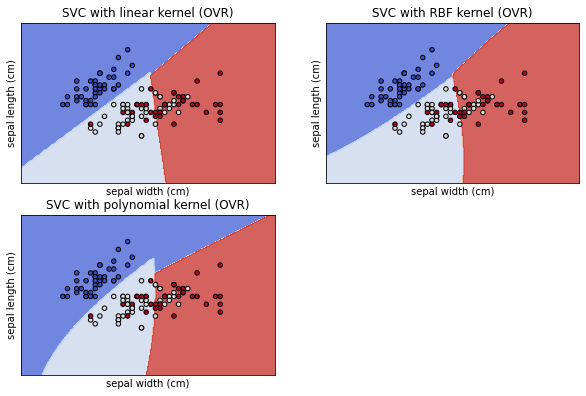

In [24]:
# create a mesh to plot in
X0, X1 = X_train[:, 0], X_train[:, 1]
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel (OVR)',
          'SVC with RBF kernel (OVR)',
          'SVC with polynomial kernel (OVR)',
          'SVC with linear kernel(OVO)',
          'SVC with RBF kernel (OVO)',
          'SVC with polynomial kernel (OVO)']
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize=(10,10))


for i, clf in enumerate((linearOVR, rbf_svcOVR, poly_svcOVR, linearOVO, rbf_svcOVO, poly_svcOVO)):
    #plt.subplots_adjust(wspace=0.4, hspace=0.4)
    pred = clf.predict(X_test)
    f1 = f1_score(pred,Y_test, average=None)
    print(titles[i],"has accuracy", np.mean(pred==Y_test), "\n with a F1 score of: ", f1)
    
    #disp = plot_confusion_matrix(clf,X_test, Y_test,display_labels=classes, cmap=plt.cm.Blues,normalize=None)
    disp = confusion_matrix(pred, Y_test)
    print(disp)#.confusion_matrix)

for i, clf in enumerate((linearOVR, rbf_svcOVR, poly_svcOVR)):
        
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(3,2,i+1)
    plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.ylabel("{}".format(feature_names[0]))
    plt.xlabel("{}".format(feature_names[1]))
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
plt.show()
    
    
    

In [25]:
X = iris.data[:,:4] #First two features
y = iris.target
feature_names = iris.feature_names[:4]
print(feature_names)
classes = iris.target_names

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, train_size=0.8)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [26]:
linearOVR = svm.SVC(kernel='linear', decision_function_shape='ovr').fit(X,y)
#poly_svcOVR = svm.SVC(kernel='poly', degree=3, decision_function_shape='ovr').fit(X,y)
#rbf_svcOVR = svm.SVC(kernel='rbf', decision_function_shape='ovr').fit(X,y)

[-0.54451326 -0.16739139  0.65785573  0.47053617]


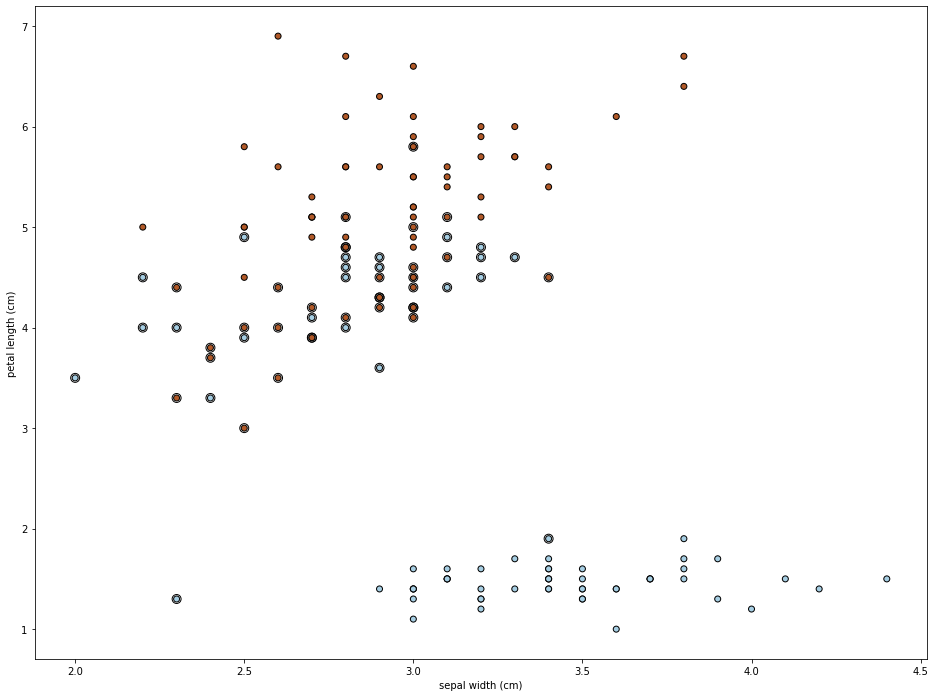

In [83]:
Y = [0] * 75 + [1] * 75

#2vs3 decision boundry
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
clf.fit(X, Y)
w = clf.coef_[0]
print(w)
a = -w[1] / w[2]

h = 0.02
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min,y_max,h))

yy2 = a * xx + (clf.intercept_[0]) / w[0]

#print(len(clf.support_vectors_))
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))

yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(16, 12))
plt.clf()
#plt.plot(xx, yy, "k-")
#plt.plot(xx, yy_down, "k-")
#plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 1], clf.support_vectors_[:, 2], s=80, facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X[:, 1], X[:, 2], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[2])
plt.show()

#3vs4 decision boundry
